In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [285]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(1000, n_features=2, centers=5, random_state=2)

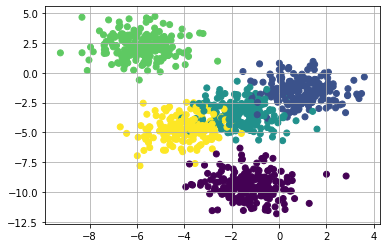

In [286]:
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c = Y);

In [287]:
K = 5
color = ['red', 'green',  'blue', 'ornge', 'yellow']

clusters = {}
# generate random centers for each clusters
for i in range(K):
    center = 10*(2*np.random.random((X.shape[1], )) - 1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    clusters[i] = cluster
    

In [288]:
def distance(v1, v2):
    return np.sum((v2 - v1)**2)**0.5

def update_clusters(clusters, K): # E -- step
    # update the center of each cluster with zero new points 
    for k in range(K):
        pts = np.array(clusters[k]['points'])
        if pts.shape[0] > 0: # if cluster has some points
            new_center = np.mean(pts,  axis = 0)
            clusters[k]['center'] = new_center
            clusters[k]['points'] = []
        

def plot_clustors(clusters, K): 
    
    for k in range(K):
        
        pts = np.array(clusters[k]['points'])
        
        # plot the cluster points
        try:
            plt.scatter(pts[:, 0], pts[:, 1], color= clusters[k]['color'])
        except:
            pass
        # plot the cluster center
        plt.scatter(clusters[k]['center'][0], clusters[k]['center'][1], color = 'black', marker='*')
        
    
    
def k_means(X, clusters, K): # M -- step 
    m = X.shape[0]
    for i in range(m):
        dist = []
        
        for k in range(K):
            dist.append(distance(clusters[k]['center'], X[i]))
          
        nearest_cluster = np.argmin(dist)
        clusters[nearest_cluster]['points'].append(X[i])
    
    plot_clustors(clusters, K)
    update_clusters(clusters, K)

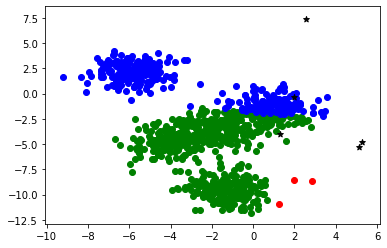

In [289]:
k_means(X, clusters, K)